# Avaliação Final - ECD - Estatística para Ciência de Dados

### Questão 3:<br>
Na base de dados comorbidades.csv, são apresentados dados reais de uma amostra obtida do seade-R (Fonte dos dados originais: https://github.com/seade-R/dados-covid-sp). Essa base de dados contém as seguintes informações sobre pacientes que foram internados com diagnóstico de COVID-19 entre fevereiro de 2020 e maio de 2021:<br>

Identificação do paciente<br>

Município<br>

Código do IBGE<br>

Idade<br>

Sexo (1: feminino, 0: masculino)<br>

Óbito (1: sim, 0: não)<br>

Comorbidades: asma, cardiopatia, diabetes, doença hematológica, doença renal, doença hepática, doença neurológica, imunodepressão, obesidade, outros fatores de risco, pneumopatia, puérpera, síndrome de down (para cada uma delas 1: presente, 0: ausente)<br>

As observações com dados faltantes foram excluídas da base original para esta análise específica, considerando que essa exclusão não afeta a representatividade da amostra.<br>

     3. Descreva por meio de gráficos a associação entre idade e óbito, e repita para sexo e óbito. Considere então as comorbidades: asma, cardiopatia, diabetes, doença renal e obesidade e investigue a associação de cada uma delas com a variável óbito. Note que algumas variáveis estão codificadas em 0 e 1 mas são qualitativas. Fique atento à forma de analisar a associação entre duas variáveis qualitativas. Comente os resultados obtidos, observando que não é possível concluir estatisticamente se existe ou não associação entre as variáveis apenas com análise exploratória.<br>

     4. Ajuste um modelo de regressão logística com intercepto, considerando como variáveis preditoras o sexo, a idade e as comorbidades asma, cardiopatia, diabetes, doenca_renal, obesidade. Descreva o impacto da presença das duas comorbidades com maior significância marginal utilizando a razão de chances. Os resultados confirmam a investigação inicial da Questão 3? Comente sobre os resultados obtidos. Para este item, considere que não é necessário fazer a seleção de atributos ou dividir a base em treinamento e teste. <br>


O formato de entrega será de dois arquivos: <br>

Arquivo .pdf, com os resultados resumidos e comentados.<br>

Jupyter Notebook .ipynb, com os códigos usados para a obtenção dos resultados. Este notebook deve ser comentado de forma a facilmente identificar os códigos de cada análise.<br>

Atenção, se constatado plágio, a questão será zerada.<br>

Tamanho máximo para arquivos: 7.8Gb, número máximo de anexos: 2<br>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Leitura dos dados
df = pd.read_csv('comorbidades.csv', index_col=0)
print(df.shape)
df.head()

(1182, 18)


,nome_munic,codigo_ibge,idade,sexo,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
66,Ferraz de Vasconcelos,3515707,86,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
97,São Paulo,3550308,62,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
100,São José dos Campos,3549904,58,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
207,Mauá,3529401,54,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
249,Cajamar,3509205,62,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0


## Questão 3:

In [2]:
# total de não óbitos e óbitos da base de dados
print(df[['obito']].groupby(['obito']).size().reset_index(name='count'))
df[['obito']].groupby(['obito']).size()/df.shape[0]

   obito  count
0      0    753
1      1    429


obito
0    0.637056
1    0.362944
dtype: float64

Na base de dados, 36% dos casos são de óbito e 64% de não óbito.

### Associação entre óbito e idade

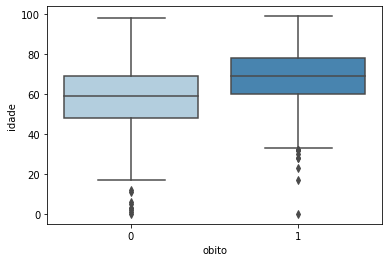

In [3]:
sns.boxplot(y=df["idade"],x=df["obito"], palette="Blues");

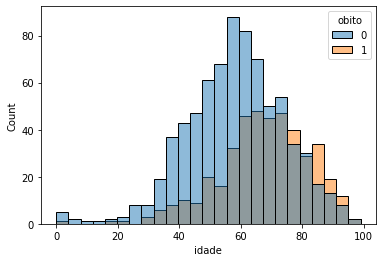

In [4]:
sns.histplot(df, x="idade", hue="obito");

A mediana para óbito ('obito'=1) é maior do que a mediana para não óbito ('obito'=0).<br>
É uma pista de que quanto maior a idade maior o risco de óbito.<br>
Entretanto, o IQ (intervalo interquartil) de ambos têm uma faixa de idades comum, indicando que uma análise mais aprofundada se faz necessária.

### Associação entre óbito e sexo

In [5]:
# Tabela de dupla entrada
tabela_dupla = pd.crosstab(index=df['obito'], columns=df['sexo'])
tabela_dupla

sexo,0,1
obito,,
0,400,353
1,232,197


In [6]:
tabela_dupla_prop = tabela_dupla/tabela_dupla.sum()
tabela_dupla_prop.round(3)

sexo,0,1
obito,,
0,0.633,0.642
1,0.367,0.358


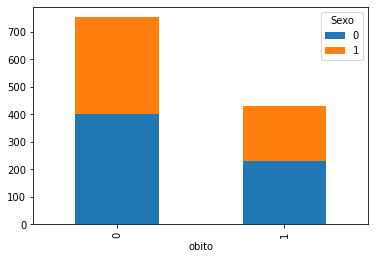

In [7]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Sexo')
plt.show()

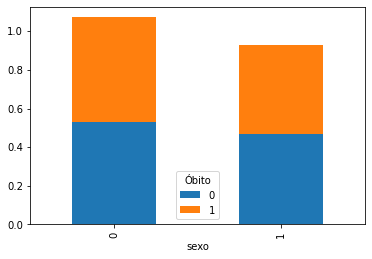

In [8]:
tabela_dupla = pd.crosstab(index=df['sexo'], columns=df['obito'])
tabela_dupla_prop = tabela_dupla/tabela_dupla.sum()
tabela_dupla_prop.plot.bar(stacked=True)
plt.legend(title='Óbito')
plt.show()

Uma vez infectado, a taxa de óbito para ambos os sexos é muito similar, próximo a 36%, a mesma do total do dataframe, sendo uma pista de que não há uma correlação entre esses fatores.<br>

### Associação entre óbito e asma

In [9]:
tabela_dupla = pd.crosstab(index=df['obito'], columns=df['asma'])
tabela_dupla

asma,0,1
obito,,
0,722,31
1,417,12


In [10]:
tab = tabela_dupla/tabela_dupla.sum()
tab.round(3)

asma,0,1
obito,,
0,0.634,0.721
1,0.366,0.279


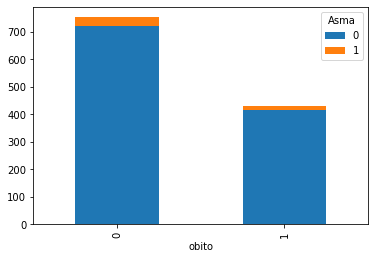

In [11]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Asma')
plt.show()

Não há um aumento na taxa de morte para os portadores de asma uma vez infectados pelo vírus da covid-19, pelo contrário, há uma redução.<br>
Porém, há um número muito pequeno de observações de casos de asma, o que pode ocasionar distorções nas conclusões.

### Associação entre óbito e cardiopatia

In [12]:
tabela_dupla = pd.crosstab(index=df['obito'], columns=df['cardiopatia'])
tabela_dupla

cardiopatia,0,1
obito,,
0,366,387
1,183,246


In [13]:
tab = tabela_dupla/tabela_dupla.sum()
tab.round(3)

cardiopatia,0,1
obito,,
0,0.667,0.611
1,0.333,0.389


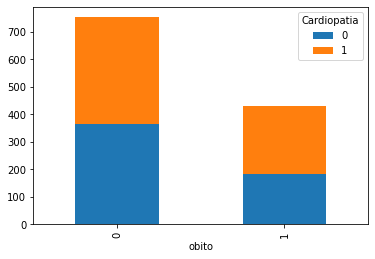

In [14]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Cardiopatia')
plt.show()

Há um aumento na taxa de morte para os portadores de cardiopatia uma vez infectados pelo vírus da covid-19.

### Associação entre óbito e diabetes

In [15]:
tabela_dupla = pd.crosstab(index=df['obito'], columns=df['diabetes'])
tabela_dupla

diabetes,0,1
obito,,
0,497,256
1,248,181


In [16]:
tab = tabela_dupla/tabela_dupla.sum()
tab.round(3)

diabetes,0,1
obito,,
0,0.667,0.586
1,0.333,0.414


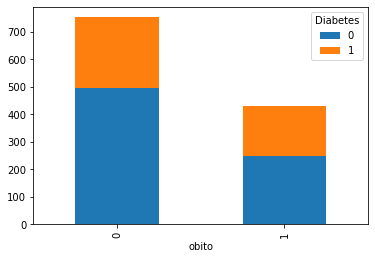

In [17]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Diabetes')
plt.show()

Há um aumento na taxa de morte para os portadores de diabetes uma vez infectados pelo vírus da covid-19.

### Associação entre óbito e doença renal

In [18]:
tabela_dupla = pd.crosstab(index=df['obito'], columns=df['doenca_renal'])
tabela_dupla

doenca_renal,0,1
obito,,
0,716,37
1,395,34


In [19]:
tab = tabela_dupla/tabela_dupla.sum()
tab.round(3)

doenca_renal,0,1
obito,,
0,0.644,0.521
1,0.356,0.479


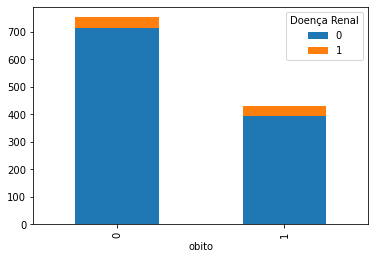

In [20]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Doença Renal')
plt.show()

Há um aumento na taxa de morte para os portadores de doença renal uma vez infectados pelo vírus da covid-19.<br>
Porém, há um número muito pequeno de observações de casos de doença renal, o que pode ocasionar distorções nas conclusões.

### Associação entre óbito e obesidade

In [21]:
tabela_dupla = pd.crosstab(index=df['obito'], columns=df['obesidade'])
tabela_dupla

obesidade,0,1
obito,,
0,651,102
1,361,68


In [22]:
tab = tabela_dupla/tabela_dupla.sum()
tab.round(3)

obesidade,0,1
obito,,
0,0.643,0.6
1,0.357,0.4


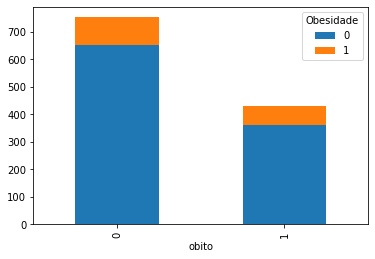

In [23]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Obesidade')
plt.show()

Há um aumento na taxa de morte para os portadores de obesidade uma vez infectados pelo vírus da covid-19.<br>

### Associações entre óbito e atributos selecionados - Conclusão - Análise Exploratória

Análise descritiva ou análise exploratória de dados (AED) efetuada acima tem como objetivos básicos:<br>
. explorar os dados para descobrir ou identificar aspectos ou padrões de maior interesse,<br>
. representar os dados de forma a destacar ou chamar a atenção para aspectos ou padrões que podem ou não se confirmar inferencialmente.<br>

Com base nas análises de visualização e exploração de dados, parece existir associação entre 'óbito' e as variáveis 'idade', 'cardiopatia', 'diabetes', 'doenca_renal', 'obesidade' e 'asma', sendo que essa última apresenta uma possível correlação negativa.<br>
Da mesma forma essa análise indicou que o risco de 'óbito' possivelmente não esteja associada ao 'sexo'.<br>

Embora sejam indicativos baseados em dados, não é possível concluir estatisticamente se existe ou não associação entre as variáveis apenas com análise exploratória, sendo necessária uma análise confirmatória através de análises inferenciais.

## Questão 4:

In [24]:
# Adicionando uma coluna de uns referente ao intercepto
n=len(df)
df.loc[:,'const']  = np.ones(n).reshape(n,1)

attributes = df[['const', 'idade', 'sexo', 'asma', 'cardiopatia', 'diabetes', 'doenca_renal', 'obesidade']]
target = df[['obito']]

# O modelo de Regressão Logística é um caso de modelo binomial
# Ajustando um modelo MLG com resposta binária com intercepto
glm_binom = sm.GLM(target, attributes, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                 1182
Model:                            GLM   Df Residuals:                     1174
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -714.90
Date:                Wed, 16 Jun 2021   Deviance:                       1429.8
Time:                        08:20:55   Pearson chi2:                 1.21e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.4709      0.317    -10.948   

Vamos continuar com a análise considerando que não é necessário fazer a seleção de atributos ou dividir a base em treinamento e teste, conforme enunciado.

### Comorbidades de maior significância marginal

In [25]:
comorb_sig = res.pvalues.sort_values()
comorb_sig

const           6.776014e-28
idade           5.670621e-21
obesidade       3.806654e-04
diabetes        4.186797e-02
doenca_renal    1.050339e-01
sexo            2.652245e-01
asma            3.271754e-01
cardiopatia     6.241095e-01
dtype: float64

In [26]:
comorb_maior_sig = []
count=0
for i in range(len(comorb_sig)):
    if count ==2:
        break
    if comorb_sig.index[i]=='const' or comorb_sig.index[i]=='idade' or comorb_sig.index[i]=='sexo':
        continue
    else:
        comorb_maior_sig.append(comorb_sig.index[i])
        count +=1
        
print(f"Comorbidades de maior significância: {comorb_maior_sig}")  

Comorbidades de maior significância: ['obesidade', 'diabetes']


In [27]:
# Impacto da presença das duas comorbidades com maior significância marginal utilizando a razão de chances.
# OR: Opportunity Ratio

# Obesidade
OR_obesidade = np.exp(res.params['obesidade']).round(4)
print('Obesidade:\n', 'Razão de Chances:', OR_obesidade)
print('Aumento de percentual na chance de vir a óbito: %.2f' % ((OR_obesidade - 1)*100), '%')

# Diabetes
OR_diabetes = np.exp(res.params['diabetes']).round(4)
print('\nDiabetes:\n', 'Razão de Chances:', OR_diabetes)
print('Aumento de percentual na chance de vir a óbito: %.2f' % ((OR_diabetes - 1)*100), '%')

Obesidade:
 Razão de Chances: 1.9385
Aumento de percentual na chance de vir a óbito: 93.85 %

Diabetes:
 Razão de Chances: 1.304
Aumento de percentual na chance de vir a óbito: 30.40 %


### Associações entre óbito e atributos selecionados - Análise Confirmatória - Conclusão

Na análise exploratória de dados (AED), identificamos como possíveis associações com 'obito' as variáveis:  'idade', 'cardiopatia', 'diabetes', 'doenca_renal', 'obesidade' e 'asma', e sem associação a variável 'sexo'.<br>

Num nível de confiança de 95%, ou seja, p-value 0.050, concluímos nessa análise confirmatória:<br>

p-value < 0.050 (maior significância marginal): 'idade', 'obesidade', 'diabetes'<br>

p-value > 0.050 (menor significância marginal): 'sexo', 'cardiopatia', 'doenca_renal', 'asma'<br>

Portanto, 3 variáveis tiveram mudança de classificação: 'cardiopatia', 'doenca_renal', 'asma'<br>

As demais tiveram sua associação ou não associação confirmadas nessa última análise.<br>
